## Sentiment Analysis on Product Reviews


In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
dataset= pd.read_csv('IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shahzaib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text
dataset['reviews']= dataset['review'].apply(clean_text)
dataset.head()

,review,sentiment,reviews
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


In [14]:
dataset=dataset.drop(columns='review')

In [15]:
dataset.head()

,sentiment,reviews
0,positive,one reviewers mentioned watching oz episode ho...
1,positive,wonderful little production br br filming tech...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically family little boy jake thinks zombie...
4,positive,petter mattei love time money visually stunnin...


Shape: (50000, 2)

Columns: Index(['sentiment', 'reviews'], dtype='object')

Data Types:
 sentiment    object
reviews      object
dtype: object

Number of duplicate rows: 423

Missing values:
 sentiment    0
reviews      0
dtype: int64


/tmp/ipykernel_19342/2062909021.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


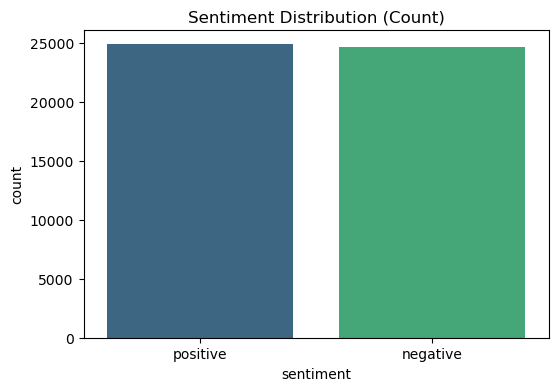

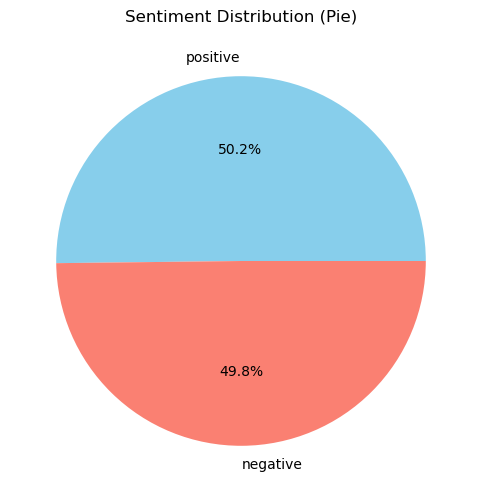

In [16]:
#eda

print("Shape:", dataset.shape)
print("\nColumns:", dataset.columns)
print("\nData Types:\n", dataset.dtypes)

duplicates = dataset.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

data = dataset.drop_duplicates()

print("\nMissing values:\n", data.isnull().sum())

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title("Sentiment Distribution (Count)")
plt.show()

plt.figure(figsize=(6,6))
data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue','salmon'])
plt.title("Sentiment Distribution (Pie)")
plt.ylabel("")
plt.show()


In [19]:
dataset['sentiment'] = dataset['sentiment'].map({'positive': 1, 'negative': 0})


In [20]:
dataset.head()

,sentiment,reviews
0,1,one reviewers mentioned watching oz episode ho...
1,1,wonderful little production br br filming tech...
2,1,thought wonderful way spend time hot summer we...
3,0,basically family little boy jake thinks zombie...
4,1,petter mattei love time money visually stunnin...


In [25]:
#Splitting Training and testing
from sklearn.model_selection import train_test_split

X = data['reviews']   
y = data['sentiment']        

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state= 42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 39661
Testing set size: 9916


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)


X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF vectorization complete ✔️")
print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)

TF-IDF vectorization complete ✔️
Train shape: (39661, 5000)
Test shape: (9916, 5000)


In [27]:
# Model Training
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Accuracy: 0.8543767648245261

Classification Report:

              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      4939
    Positive       0.85      0.86      0.86      4977

    accuracy                           0.85      9916
   macro avg       0.85      0.85      0.85      9916
weighted avg       0.85      0.85      0.85      9916



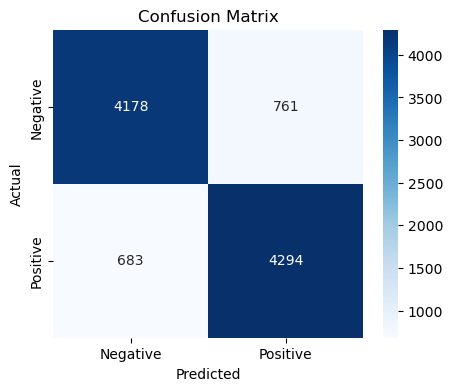

In [28]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_tfidf)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Precision, Recall, F1
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
